### (a) Download Data

Package imports

In [69]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.io import arff

Get the Vertebral Column Data Set

In [70]:
data_2c = arff.loadarff('data/vertebral_column_data/column_2C_weka.arff')
df_2c = pd.DataFrame(data_2c[0])

In [71]:
df_2c.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


In [72]:
df_2c['class'] = df_2c['class'].str.decode('utf-8')

In [73]:
df_2c['class'] = df_2c['class'].replace({'Abnormal': 1, 'Normal': 0})



/var/folders/5_/zn1tlqnd50z90_mf2r06kkf40000gn/T/ipykernel_29958/1991669808.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_2c['class'] = df_2c['class'].replace({'Abnormal': 1, 'Normal': 0})


In [74]:
df_2c

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

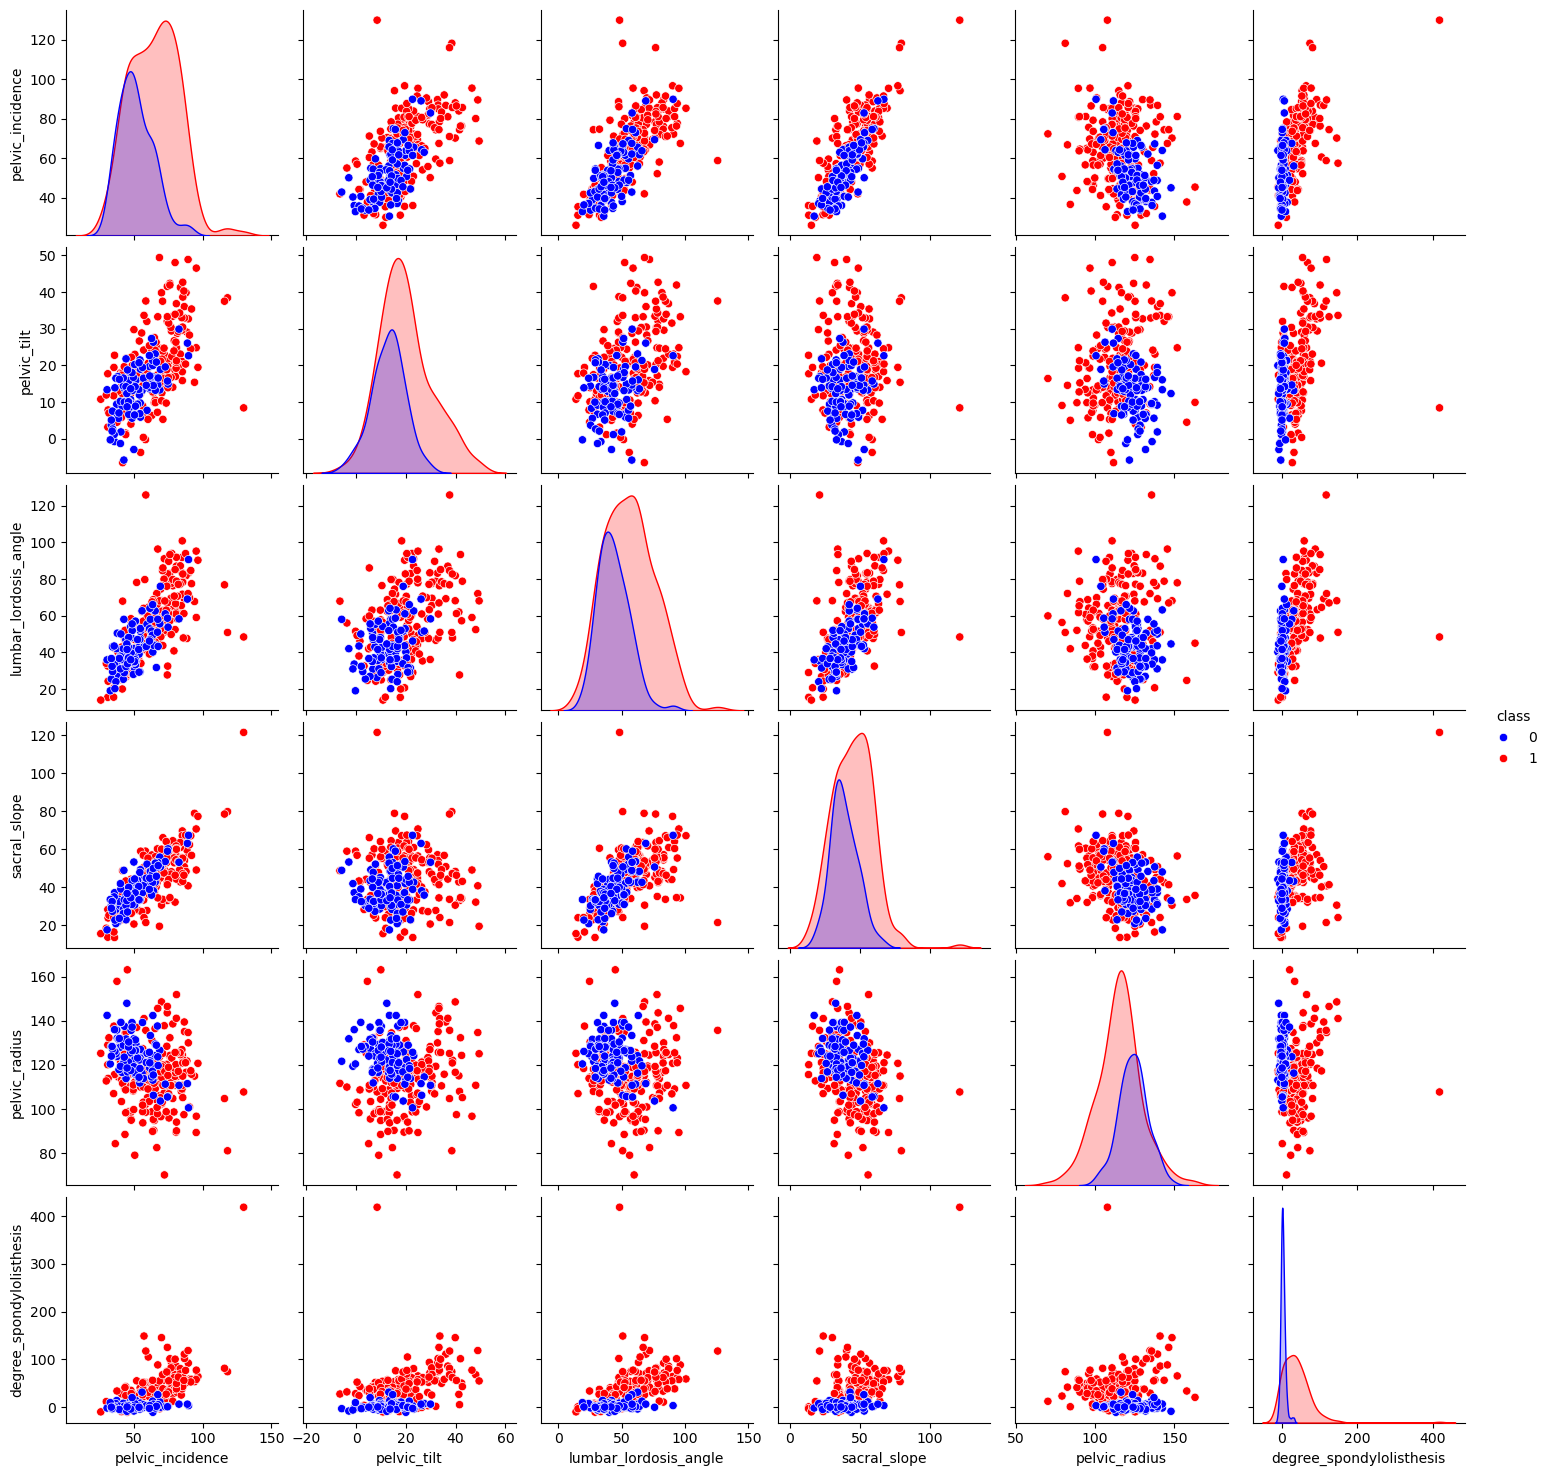

In [75]:
sns.pairplot(df_2c, hue='class', palette={0: 'blue', 1: 'red'})

plt.show()


#Helped by ChatGpt:

#Prompt:
# how to make scatterplots of the independent variables in a dataset with multiple variables?. Also how to use color to show Classes 0 and 1 based on the dependent variable

#Output:
# You can use matplotlib and seaborn to create scatterplots with color-coding for the classes. Here’s how you can create scatterplots of the independent variables, using different colors to represent Classes 0 and 1.
# Step-by-step approach:

# 	1.	First, import the necessary libraries.
# 	2.	Use seaborn.pairplot() to visualize the scatterplots for all independent variables, coloring the points by the class column.

#### ii. Boxplots

In [76]:
variables = list((df_2c.columns.unique()))
variables.remove('class')

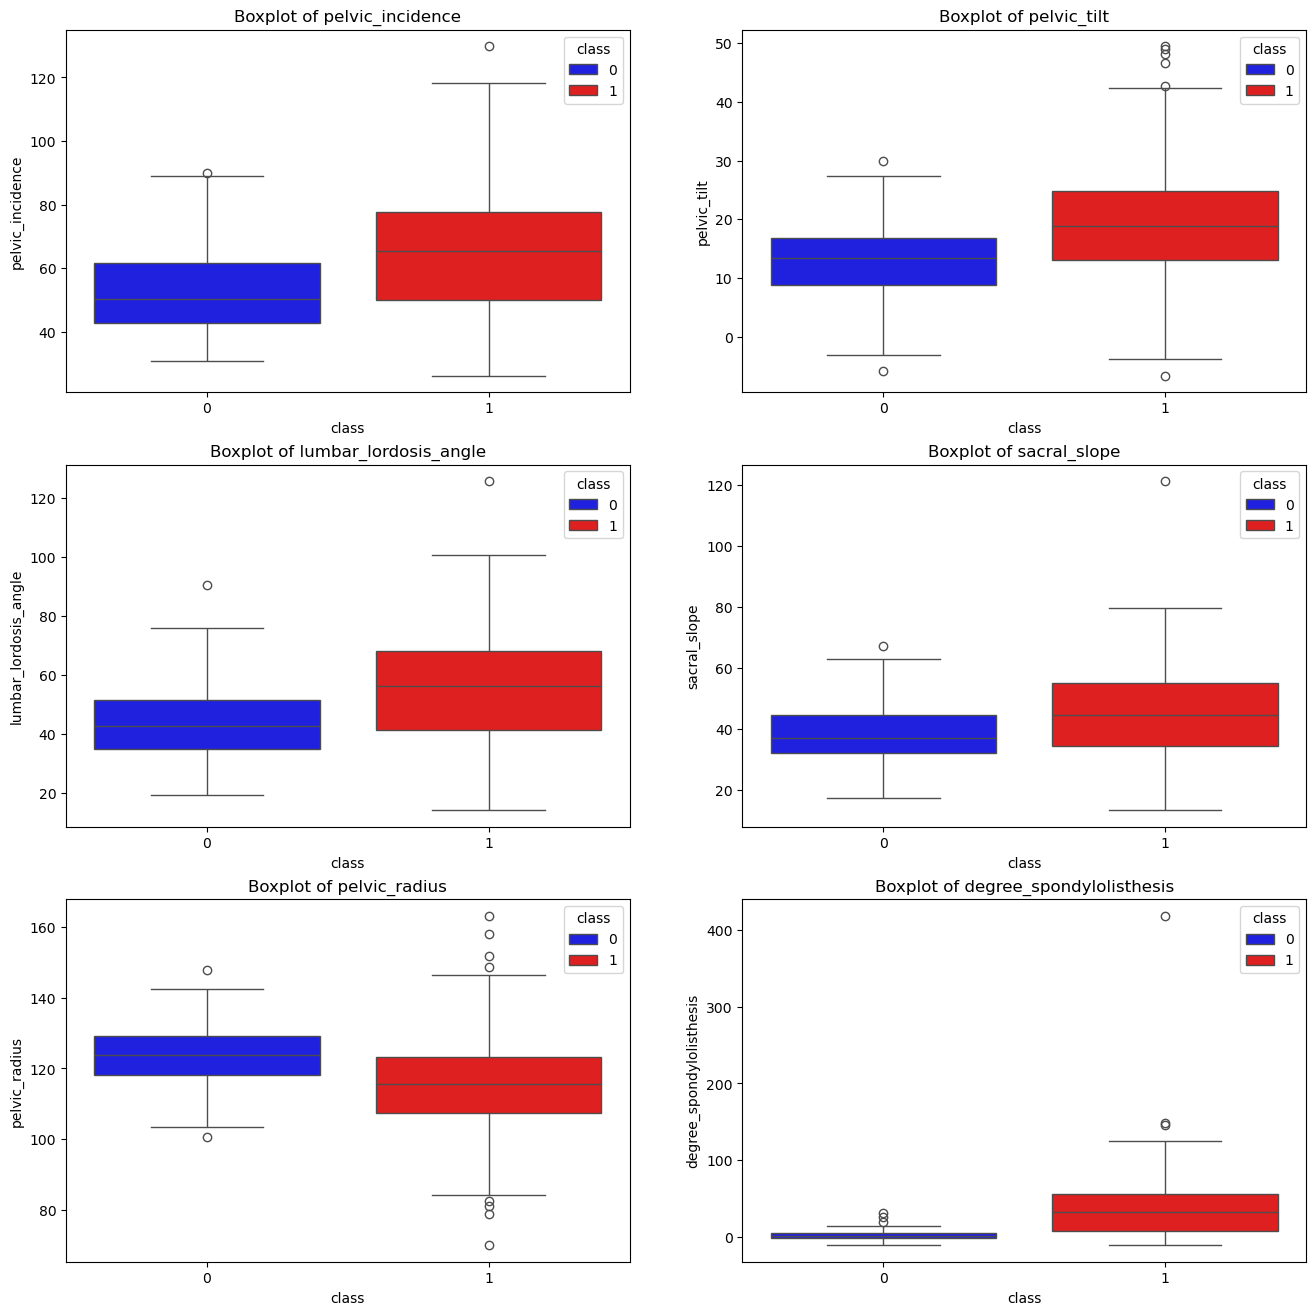

In [77]:
cnt = 0
plt.figure(figsize=(16, 16))
for i in variables:
    cnt+= 1
    plt.subplot(3, 2, cnt)
    sns.boxplot(data = df_2c, x = 'class', y = i, hue= 'class', palette={0: 'blue', 1: 'red'})
    plt.title(f'Boxplot of {i}')

plt.show()

#### iii. Split Data Set

In [78]:
class_0 = df_2c[df_2c['class'] == 0]
train_class0 = class_0.iloc[0 : 70] 

test_class0 = class_0.iloc[70 : ]

In [79]:
class_1 = df_2c[df_2c['class'] == 1]
train_class1 = class_1.iloc[0 : 140]

test_class1 = class_1.iloc[140 : ]

In [80]:
train_data = pd.concat([train_class0, train_class1], ignore_index=True)

test_data = pd.concat([test_class0, test_class1], ignore_index=True)

train_x = train_data.iloc[ : , : -1]
train_y = train_data.iloc[ : , -1]

test_x = test_data.iloc[ : , : -1]
test_y = test_data.iloc[ : , -1]

### (c) Classification

#### i. Euclidean Metric

In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, f1_score

#### ii. Test Data

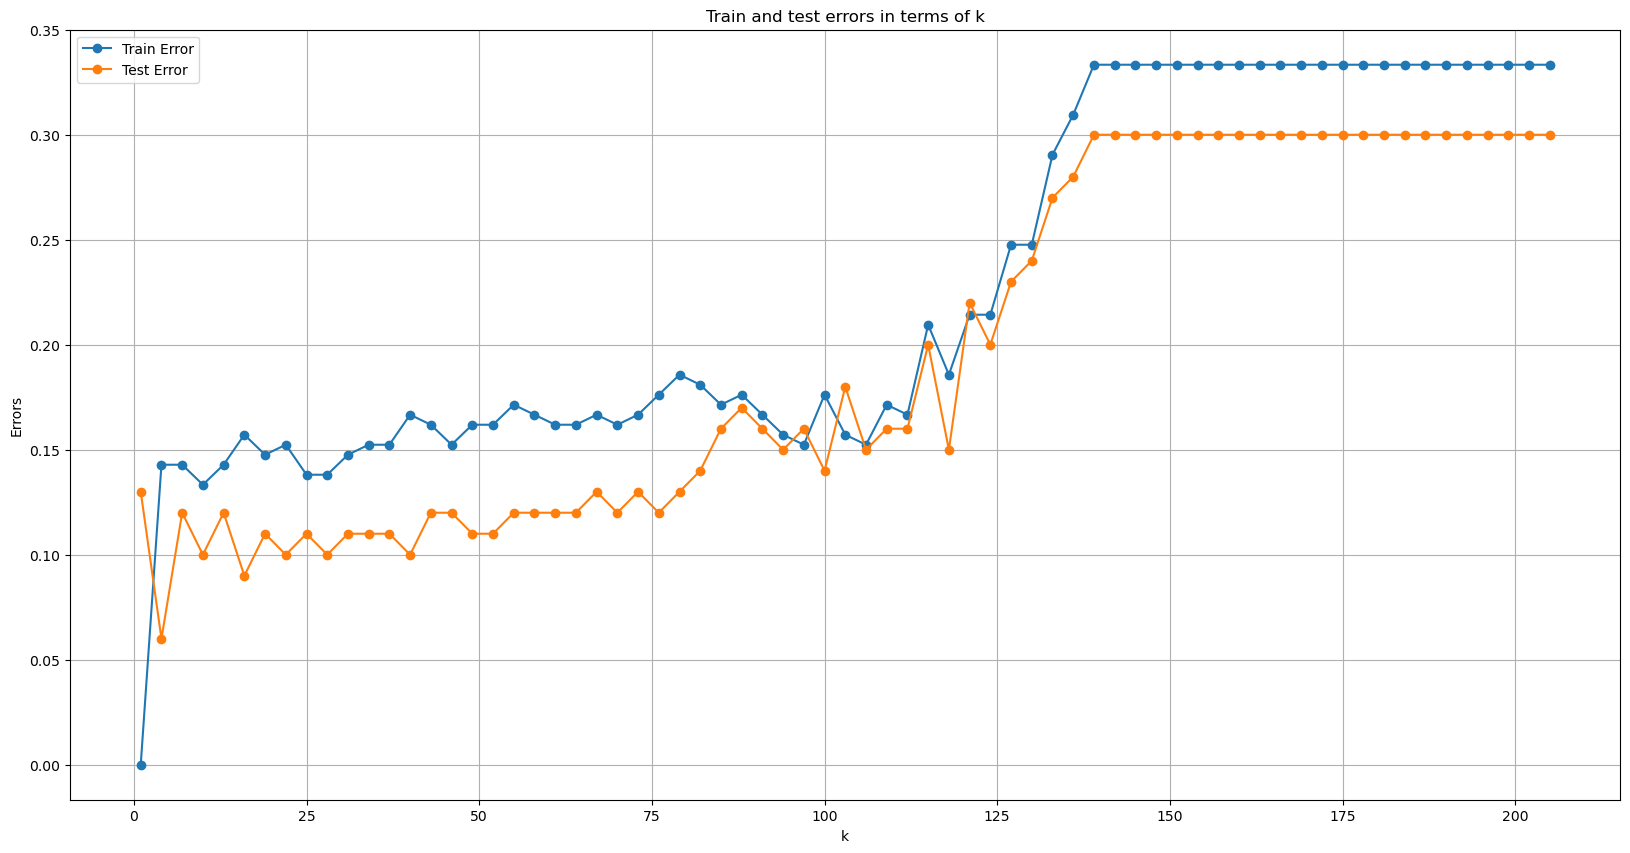

0.06000000000000005
0.0
[0.0, 0.1428571428571429, 0.1428571428571429, 0.1333333333333333, 0.1428571428571429, 0.15714285714285714, 0.14761904761904765, 0.1523809523809524, 0.13809523809523805, 0.13809523809523805, 0.14761904761904765, 0.1523809523809524, 0.1523809523809524, 0.16666666666666663, 0.16190476190476188, 0.1523809523809524, 0.16190476190476188, 0.16190476190476188, 0.17142857142857137, 0.16666666666666663, 0.16190476190476188, 0.16190476190476188, 0.16666666666666663, 0.16190476190476188, 0.16666666666666663, 0.17619047619047623, 0.18571428571428572, 0.18095238095238098, 0.17142857142857137, 0.17619047619047623, 0.16666666666666663, 0.15714285714285714, 0.1523809523809524, 0.17619047619047623, 0.15714285714285714, 0.1523809523809524, 0.17142857142857137, 0.16666666666666663, 0.20952380952380956, 0.18571428571428572, 0.2142857142857143, 0.2142857142857143, 0.24761904761904763, 0.24761904761904763, 0.29047619047619044, 0.30952380952380953, 0.33333333333333337, 0.33333333333333

In [82]:
k_num = list(range(1, 208, 3))
train_errors = []
test_errors = []

for k in k_num:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(train_x, train_y)
    #training error
    predict_trainy = knn.predict(train_x)
    train_error = 1 - accuracy_score(train_y, predict_trainy)
    train_errors.append(train_error)
    #testing error
    predict_testy = knn.predict(test_x)
    test_error = 1 - accuracy_score(test_y, predict_testy)
    test_errors.append(test_error)



plt.figure(figsize=(20, 10))
plt.plot(k_num, train_errors, label='Train Error', marker = 'o')
plt.plot(k_num, test_errors, label='Test Error', marker = 'o')
plt.title('Train and test errors in terms of k')
plt.xlabel('k')
plt.ylabel('Errors')
plt.grid(True)
plt.legend()
plt.show()

print(min(test_errors))
print(min(train_errors))
print(train_errors)

<h4>Apparently, the second datapoint for k which is 4 has the lowest testing error and a relatively low training error overall, and that makes it the most suitable k or k*<h4>

In [83]:
suitable_knn = KNeighborsClassifier(n_neighbors=4, metric= 'euclidean')
suitable_knn.fit(train_x, train_y)
suitable_predict_testy = suitable_knn.predict(test_x)

print(f'confusion matrix = {confusion_matrix(test_y, suitable_predict_testy)}')

confusion matrix = [[25  5]
 [ 1 69]]


In [84]:
true_positive = 69 / (69 + 1)
true_negative = 25 / (25 + 5)

precision = precision_score(test_y, suitable_predict_testy)
f1 = f1_score(test_y, suitable_predict_testy)

print(f'True Positive Rate: {true_positive}')
print(f'True Negative Rate: {true_negative}')
print(f'Precision: {precision}')
print(f'F1-Score: {f1}')

True Positive Rate: 0.9857142857142858
True Negative Rate: 0.8333333333333334
Precision: 0.9324324324324325
F1-Score: 0.9583333333333334


#### iii. Learning Curve

0.07999999999999996


/var/folders/5_/zn1tlqnd50z90_mf2r06kkf40000gn/T/ipykernel_29958/559820156.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


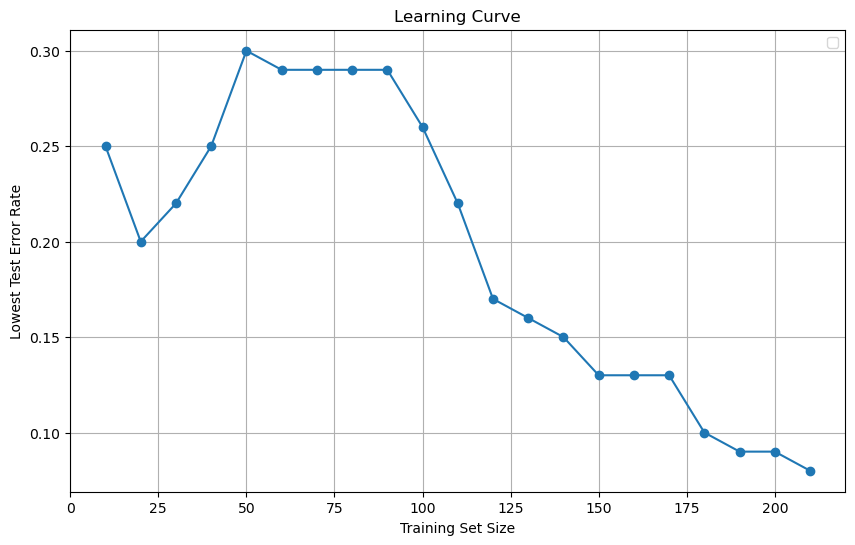

In [85]:
sample_size = list(range(10, 220, 10))
new_k_num = list(range(1, 201, 5))
errors_for_graph = []
for N in sample_size:
    train_class0_new = class_0.iloc[0 : N // 3]
    train_class1_new = class_1.iloc[0 : N - (N // 3)]
    train_new = pd.concat([train_class0_new, train_class1_new], ignore_index=True)
    train_x_new = train_new.iloc[ : , : -1]
    train_y_new = train_new.iloc[ : , -1]
    
    lowest_error = float('inf')
    for k in new_k_num:
        if k > len(train_x_new):
            continue
        knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
        knn.fit(train_x_new, train_y_new)
        pred_y_new = knn.predict(test_x)
        test_error_new = 1 - accuracy_score(test_y, pred_y_new) 
        if test_error_new < lowest_error:
            lowest_error = test_error_new

    errors_for_graph.append(lowest_error)

print(min(errors_for_graph))

plt.figure(figsize=(10, 6))
plt.plot(sample_size, errors_for_graph, marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Lowest Test Error Rate')
plt.grid(True)
plt.legend()
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

In [86]:
manhattan_error = {}
for k in new_k_num:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    knn.fit(train_x, train_y)
    pred_y = knn.predict(test_x)
    test_error = 1 - accuracy_score(test_y, pred_y) 
    manhattan_error[k] = test_error

best_k = min(manhattan_error, key = manhattan_error.get)
print(min(manhattan_error.values()))
print(best_k)

0.10999999999999999
1


##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [87]:
log10p_num = list(np.arange(0.1, 1.1, 0.1))
pnum_errors = {}
for log10p in log10p_num:
    p = 10 ** log10p
    knn = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski', p=p)
    knn.fit(train_x, train_y)
    pred_y = knn.predict(test_x)
    test_error = 1 - accuracy_score(test_y, pred_y) 
    pnum_errors[log10p] = test_error

print(min(pnum_errors, key = pnum_errors.get))
print(min(pnum_errors.values()))
    


0.7000000000000001
0.10999999999999999


##### C. Chebyshev Distance With p -> infinity.

In [88]:
cheby_errors = {}
for k in new_k_num:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=float('inf'))
    knn.fit(train_x, train_y)
    pred_y = knn.predict(test_x)
    test_error = 1 - accuracy_score(test_y, pred_y) 
    cheby_errors[k] = test_error

print(min(cheby_errors, key = cheby_errors.get))
print(min(cheby_errors.values()))


16
0.07999999999999996


#### ii. Mahalanobis Distance.

<center><h1>Kan_Herun_HW1</h1></center>
<br>
<center><h3>Github: herunkan USCID: 7222919427</h1></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

In [89]:
inverted_cov = np.cov(train_x.T)
mahalanbois_error = []
for k in new_k_num:
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': inverted_cov})
    knn.fit(train_x, train_y)
    pred_y = knn.predict(test_x)
    test_error = 1 - accuracy_score(test_y, pred_y) 
    mahalanbois_error.append(test_error)
print(mahalanbois_error)
print(min(mahalanbois_error))


#Help by ChatGpt:
#Prompt:
#Explain this error for me
# ---------------------------------------------------------------------------
# ValueError                                Traceback (most recent call last)
# Cell In[77], line 6
#       4 knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'V': inverted_cov})
#       5 knn.fit(train_x, train_y)
# ----> 6 pred_y = knn.predict(test_x)
#       7 test_error = 1 - accuracy_score(test_y, pred_y) 
#       8 mahalanbois_error.append(test_error)

# File ~/Coding/ENVS/miniconda3/envs/minimal_ds/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:271, in KNeighborsClassifier.predict(self, X)
#     268         return self.classes_[np.argmax(probabilities, axis=1)]
#     269     # In that case, we do not need the distances to perform
#     270     # the weighting so we do not compute them.
# --> 271     neigh_ind = self.kneighbors(X, return_distance=False)
#     272     neigh_dist = None
#     273 else:

# File ~/Coding/ENVS/miniconda3/envs/minimal_ds/lib/python3.12/site-packages/sklearn/neighbors/_base.py:886, in KNeighborsMixin.kneighbors(self, X, n_neighbors, return_distance)
#     883     else:
#     884         kwds = self.effective_metric_params_
# --> 886     chunked_results = list(
#     887         pairwise_distances_chunked(
#     888             X,
#     889             self._fit_X,
#     890             reduce_func=reduce_func,
# ...
#    1997         )
#    1998     return {"VI": VI}
#    1999 return {}

# ValueError: The 'VI' parameter is required for the mahalanobis metric when Y is passed.


#Output:
# The error is related to the Mahalanobis distance in KNN. Specifically, the parameter VI (which is the inverse of the covariance matrix) must be passed instead of V.

# Here’s how you can fix the issue:

# Correct the Metric Parameter from V to VI

# The VI parameter is used to specify the inverse covariance matrix for the Mahalanobis distance. You should pass it as metric_params={'VI': inverted_cov} instead of {'V': inverted_cov}.


[0.12, 0.07999999999999996, 0.08999999999999997, 0.07999999999999996, 0.09999999999999998, 0.08999999999999997, 0.12, 0.09999999999999998, 0.13, 0.10999999999999999, 0.10999999999999999, 0.08999999999999997, 0.16000000000000003, 0.12, 0.12, 0.08999999999999997, 0.10999999999999999, 0.09999999999999998, 0.15000000000000002, 0.08999999999999997, 0.16000000000000003, 0.15000000000000002, 0.18999999999999995, 0.07999999999999996, 0.12, 0.09999999999999998, 0.20999999999999996, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]
0.07999999999999996


### (e) Weighted Decision

In [90]:
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
best_errors = {}

for metric in distance_metrics:
    lowest_error = float('inf')
    best_k = None
    for k in new_k_num:
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric=metric)
        knn.fit(train_x, train_y)
        pred_y = knn.predict(test_x)
        test_error = 1 - accuracy_score(test_y, pred_y)
        
        if test_error < lowest_error:
            lowest_error = test_error
            best_k = k

        best_errors[metric] = [best_k, lowest_error]

print(best_errors)
# for metric, result in best_errors.items():
#     print(f"Best k for {metric.capitalize()} Distance: {result['best_k']}")
#     print(f"Test error for {metric.capitalize()} Distance: {result['test_error']:.4f}")

{'euclidean': [6, 0.09999999999999998], 'manhattan': [26, 0.09999999999999998], 'chebyshev': [16, 0.10999999999999999]}


### (f) Training Error Rate

<h5>The lowest training error is 0 which is obtained by using euclidean and majority polling with k = 1 on the full training dataset.<h5>